In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definir la función objetivo que queremos minimizar
def objective_function(x):
    return x**2 + 10 * np.sin(x)

In [3]:
# Visualización de la función
x = np.linspace(-10, 10, 100)
y = objective_function(x)

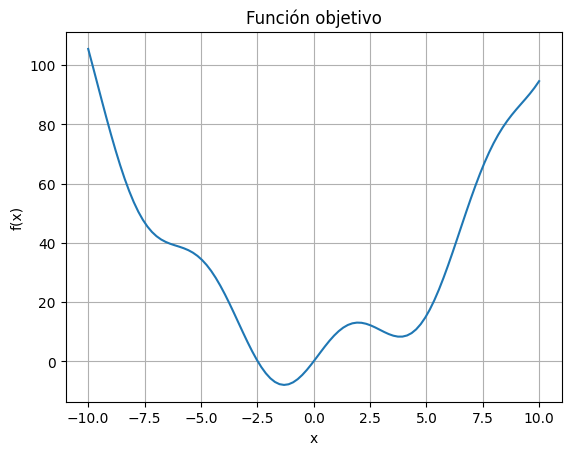

In [4]:
plt.plot(x, y, label='f(x) = x^2 + 10*sin(x)')
plt.title("Función objetivo")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [9]:
# Algoritmo Snake Optimization (SO) simplificado
def snake_optimization(bounds, n_iterations, step_size, explore_prob=0.1):
    best_position = np.random.uniform(bounds[0], bounds[1])
    best_score = objective_function(best_position)
    
    print(f'Best position at: {best_position}. Best score at: {best_score}')
    for i in range(n_iterations):
        candidate_position = best_position + np.random.uniform(-step_size, step_size)
        
        # Limitar el candidato a los límites
        candidate_position = np.clip(candidate_position, bounds[0], bounds[1])
        
        # Evaluar la función objetivo
        candidate_score = objective_function(candidate_position)
        
        # Mejorar posición si el candidato es mejor
        if candidate_score < best_score:
            best_position, best_score = candidate_position, candidate_score
        else:
            # Exploración forzada (MISO mejora) si está atrapado
            if np.random.rand() < explore_prob:
                candidate_position = np.random.uniform(bounds[0], bounds[1])  # Explorar
                candidate_score = objective_function(candidate_position)
                if candidate_score < best_score:
                    best_position, best_score = candidate_position, candidate_score
                    
        # Mostrar progreso
        print(f"Iteración {i+1},  Mejor posición: {best_position}, Mejor puntuación: {best_score}")
    
    return best_position, best_score

In [10]:
# Ejecutar el algoritmo
bounds = [-10, 10]  # Límites del espacio de búsqueda
n_iterations = 50  # Número de iteraciones
step_size = 0.5  # Tamaño de paso

best_position, best_score = snake_optimization(bounds, n_iterations, step_size)

print(f"\nMejor solución encontrada: x = {best_position}, f(x) = {best_score}")


Best position at: 8.166313367880502. Best score at: 76.20487068297194
Iteración 1, Mejor posición: 8.166313367880502, Mejor puntuación: 76.20487068297194
Iteración 2, Mejor posición: 8.166313367880502, Mejor puntuación: 76.20487068297194
Iteración 3, Mejor posición: 8.166313367880502, Mejor puntuación: 76.20487068297194
Iteración 4, Mejor posición: 3.414042233954685, Mejor puntuación: 8.96476969183934
Iteración 5, Mejor posición: 3.41915307233561, Mejor puntuación: 8.950505175207292
Iteración 6, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824
Iteración 7, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824
Iteración 8, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824
Iteración 9, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824
Iteración 10, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824
Iteración 11, Mejor posición: 3.8314518272738596, Mejor puntuación: 8.315737462965824


In [11]:
# Importar librerías necesarias
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from MISO_optimization_module import MISO_Optimizer  # Supongamos que tenemos un módulo personalizado para MISO

# Definir modelo CNN-BiLSTM
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dense(1))  # Predicción de la energía
    return model

# Definir parámetros iniciales para MISO
params = {
    'filters': [32, 64, 128],
    'units': [50, 100, 150],
    'learning_rate': [0.001, 0.01]
}

# Usar MISO para optimizar los parámetros del modelo
miso_optimizer = MISO_Optimizer(params)
best_params = miso_optimizer.optimize(create_model, train_data, val_data)

# Entrenar el modelo con los mejores parámetros
model = create_model(input_shape=(24, 2))  # Por ejemplo, 24 horas y 2 variables (irradiación, temperatura)
model.compile(optimizer='adam', loss='mse')
model.fit(train_data, train_labels, epochs=50, validation_data=(val_data, val_labels))


ModuleNotFoundError: No module named 'MISO_optimization_module'